In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hiplot as hip

# Read the cleaned DataFrames from CSV files
# Load the non-canceled flights data
non_cancelled_flights_2022 = pd.read_csv('non_cancelled_flights_2022.csv')

# Load the canceled flights data
canceled_flights_2022 = pd.read_csv('canceled_flights_2022.csv')

# Load the weather data for 2022
weather_data_2022 = pd.read_csv('weather_data_2022.csv')

# Display the heads of the loaded DataFrames to verify
print("Loaded Non-Canceled Flights Data (2022):")
print(non_cancelled_flights_2022.head())

print("\nLoaded Canceled Flights Data (2022):")
print(canceled_flights_2022.head())

print("\nLoaded Weather Data (2022):")
print(weather_data_2022.head())


Loaded Non-Canceled Flights Data (2022):
      FL_DATE                 AIRLINE                 AIRLINE_DOT  \
0  2022-11-19    Delta Air Lines Inc.    Delta Air Lines Inc.: DL   
1  2022-07-22   United Air Lines Inc.   United Air Lines Inc.: UA   
2  2022-05-01  Southwest Airlines Co.  Southwest Airlines Co.: WN   
3  2022-05-05         JetBlue Airways         JetBlue Airways: B6   
4  2022-11-12    Delta Air Lines Inc.    Delta Air Lines Inc.: DL   

  AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN       ORIGIN_CITY DEST  \
0           DL     19790       1149    MSP   Minneapolis, MN  SEA   
1           UA     19977        459    DEN        Denver, CO  MSP   
2           WN     19393       1011    BWI     Baltimore, MD  BDL   
3           B6     20409       1273    JFK      New York, NY  CHS   
4           DL     19790       2706    GRR  Grand Rapids, MI  MSP   

         DEST_CITY  ...  CRS_ELAPSED_TIME  ELAPSED_TIME  AIR_TIME  DISTANCE  \
0      Seattle, WA  ...             235.0         

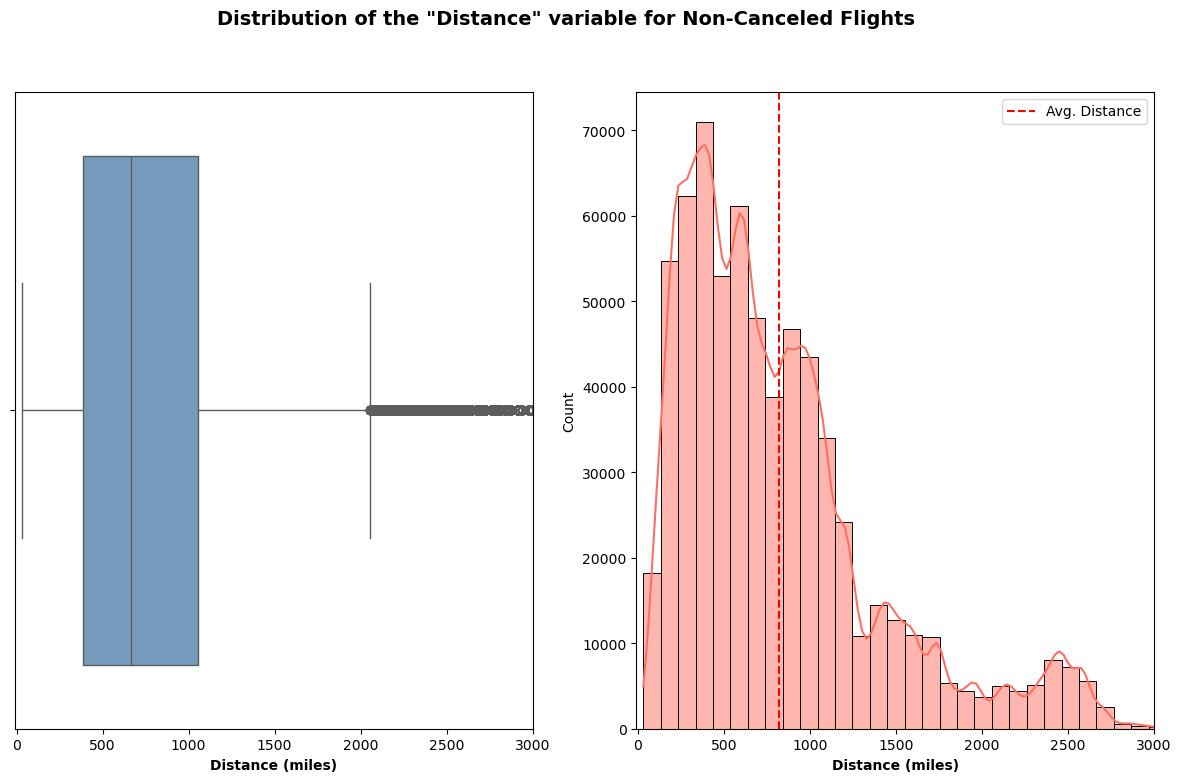

In [73]:
# first lets look at hte disturbution of the distanceo f the flights 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[14.70, 8.27])

box_color = '#6a9bc8'  
hist_color = '#ff6f61'

g = sns.boxplot(data=non_cancelled_flights_2022, x='DISTANCE', ax=ax1, color=box_color)
g.set(xlim=(-10, 3000))
g.set_xlabel(xlabel="Distance (miles)", size=10, weight="bold")


g = sns.histplot(data=non_cancelled_flights_2022, x='DISTANCE', ax=ax2, kde=True, bins=50, color=hist_color)
g.set(xlim=(-10, 3000))
g.set_xlabel(xlabel="Distance (miles)", size=10, weight="bold")

# draw mean distance
mean_distance = non_cancelled_flights_2022['DISTANCE'].mean()  # Use 'DISTANCE' instead of 'Distance'
plt.axvline(x=mean_distance, color='r', linestyle='--', label='Avg. Distance')

#used chatgpt to help draw the mean distancec becuasei  thought it would be cool OCT13th 3pm

plt.suptitle("Distribution of the \"Distance\" variable for Non-Canceled Flights", weight='bold', size=14)

plt.legend()
plt.show()




**Start with some Univarate anaylsis**

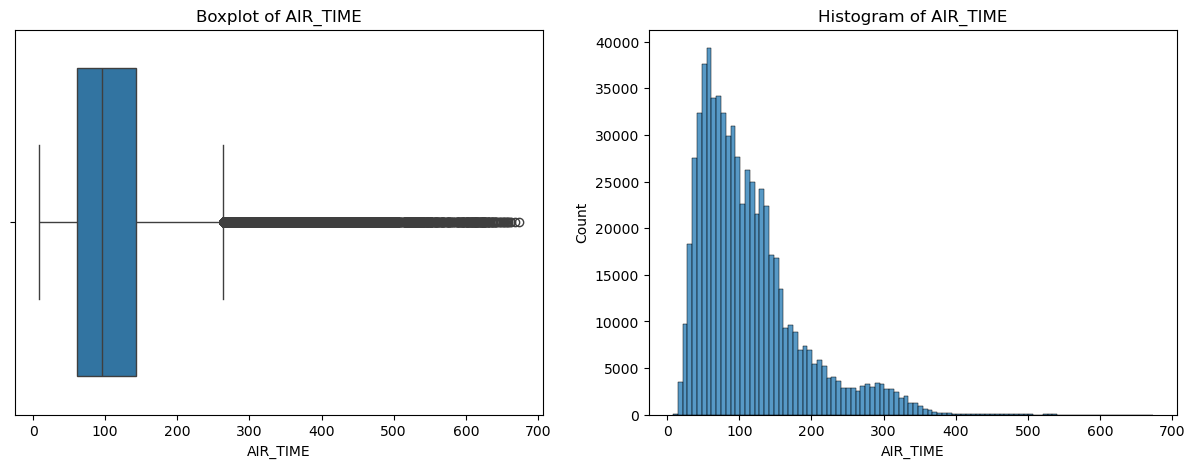

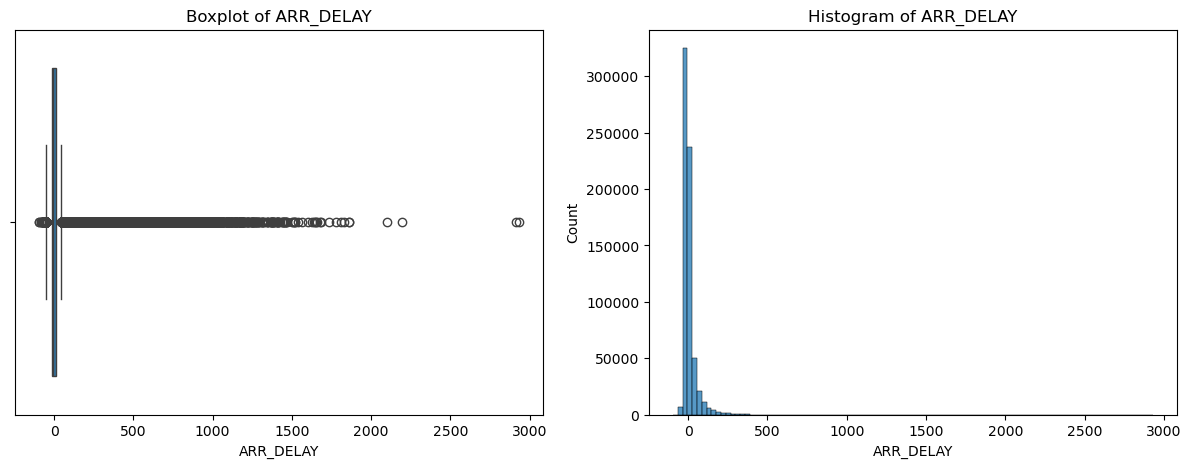

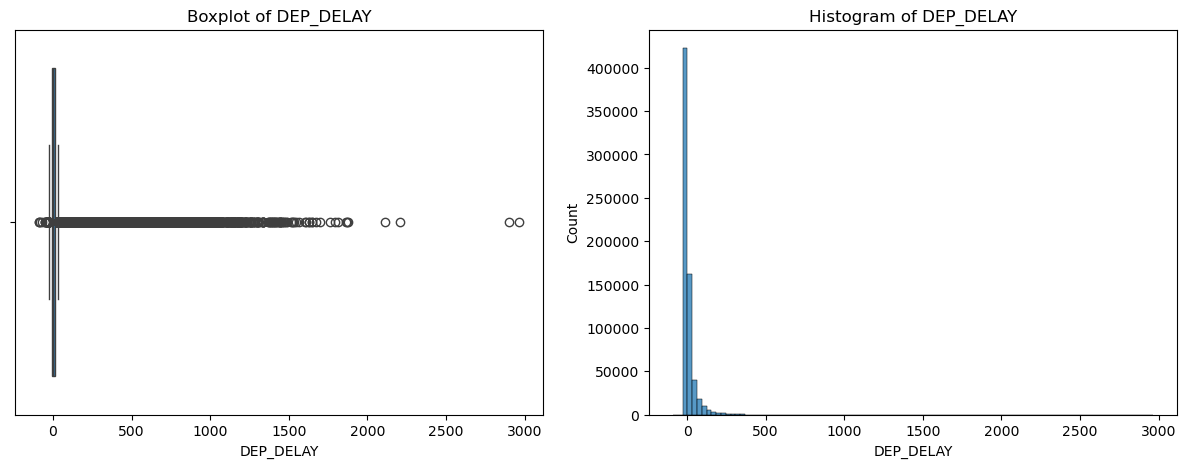

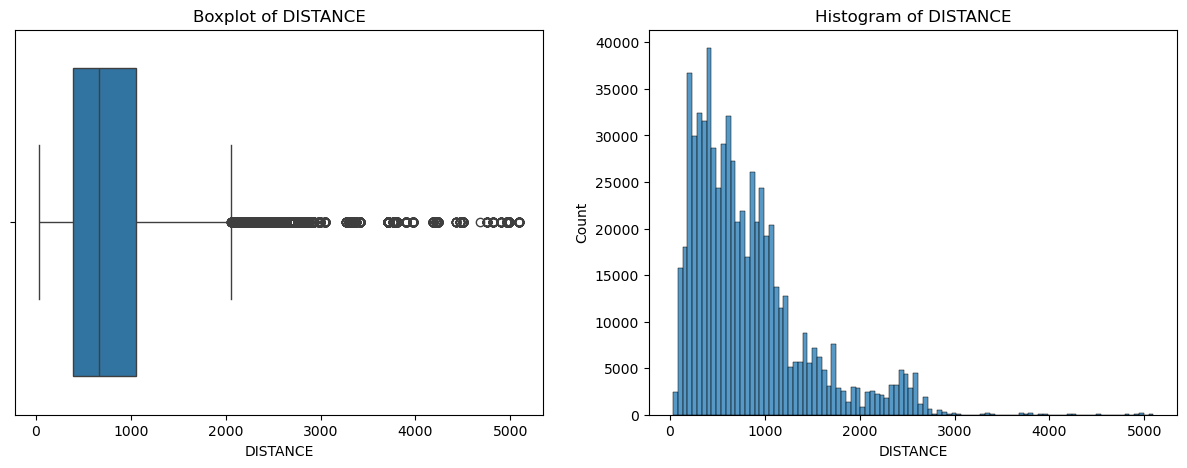

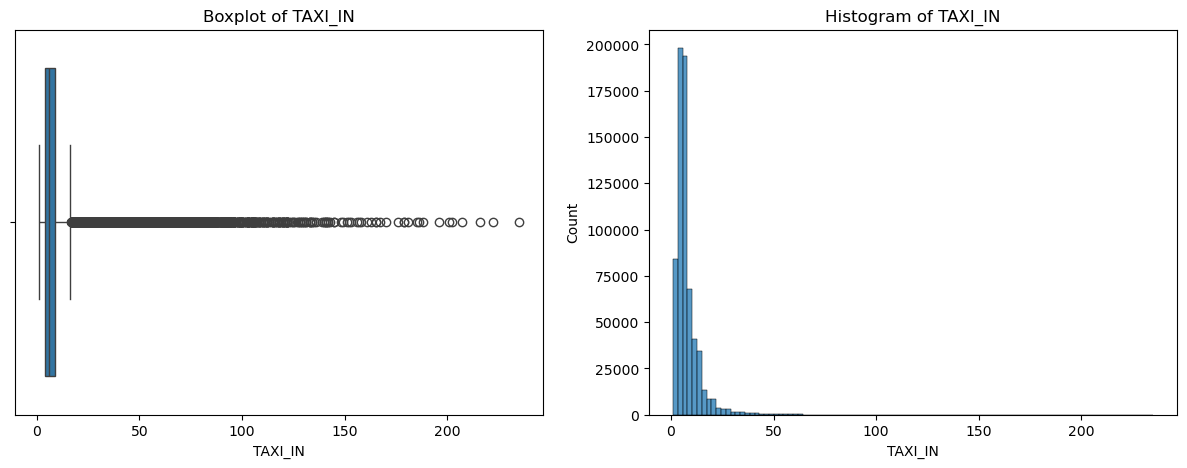

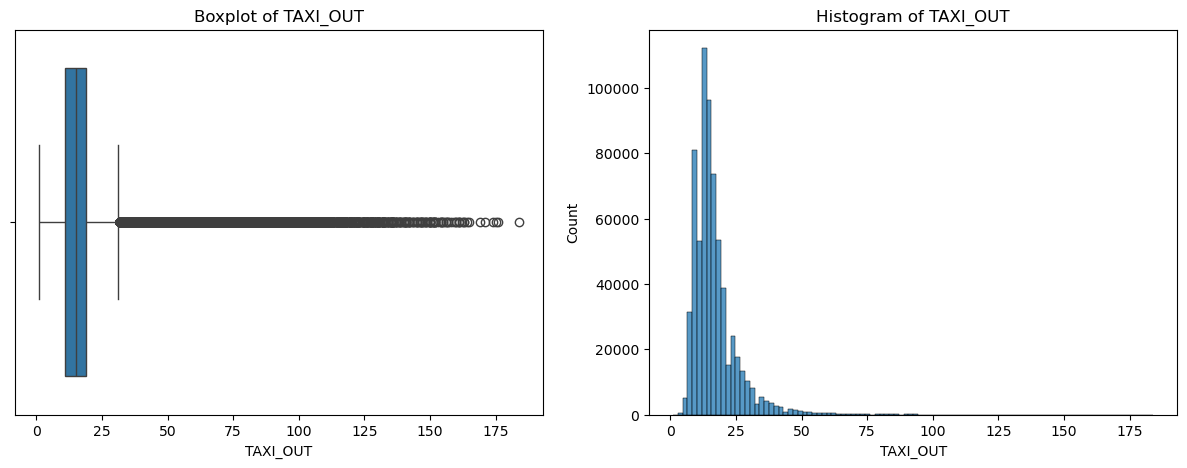

In [45]:
# List of numerical variables for analysis
numeric_columns = ['AIR_TIME', 'ARR_DELAY', 'DEP_DELAY', 'DISTANCE', 'TAXI_IN', 'TAXI_OUT']

# Loop through each numerical variable to plot boxplot and histogram
for column in numeric_columns:
    fig, (box_plot_ax, hist_plot_ax) = plt.subplots(ncols=2, figsize=(15, 5))
    
    # Boxplot to visualize outliers
    sns.boxplot(data=non_cancelled_flights_2022, ax=box_plot_ax, x=column)
    box_plot_ax.set_title(f'Boxplot of {column}')
    
    # Histogram to visualize distribution
    sns.histplot(non_cancelled_flights_2022[column], ax=hist_plot_ax, bins=100)
    hist_plot_ax.set_title(f'Histogram of {column}')
    
    # Display plots
    plt.show()


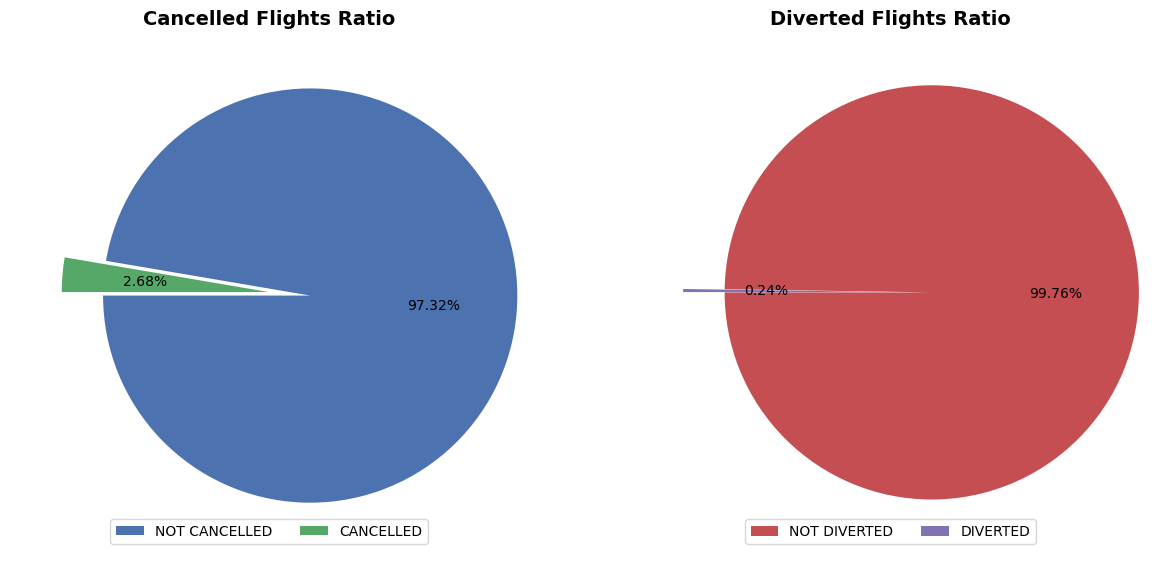

In [46]:
# Merge non-canceled and canceled flights into one DataFrame for 2022
flights_2022_filtered = pd.concat([non_cancelled_flights_2022, canceled_flights_2022])


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[14.7, 8.27])

# New color palette for a cooler look (shades of blue and purple)
colors_canceled = ['#4C72B0', '#55A868']  
colors_diverted = ['#C44E52', '#8172B3']  
#used chatgpt 4.0 on oct 15th at 5:30am for color pallet help 

# Plot 1: Canceled flights ratio
labels_cancelled = flights_2022_filtered['CANCELLED'].value_counts().index.to_list()
ax1.pie(flights_2022_filtered['CANCELLED'].value_counts(), explode=(0.2, 0), autopct='%.2f%%',
        startangle=180, counterclock=True, colors=colors_canceled)

# Plot 2: Diverted flights ratio
labels_diverted = flights_2022_filtered['DIVERTED'].value_counts().index.to_list()
ax2.pie(flights_2022_filtered['DIVERTED'].value_counts(), explode=(0.2, 0), autopct='%.2f%%',
        startangle=180, counterclock=True, colors=colors_diverted)

ax1.title.set(text="Cancelled Flights Ratio", weight='bold', size=14)
ax2.title.set(text="Diverted Flights Ratio", weight='bold', size=14)

ax1.legend(labels_cancelled, loc='lower center', ncol=2)
ax2.legend(labels_diverted, loc='lower center', ncol=2)

plt.show()


This shows us that in 2022 a remarkable low numebr of fligths were cancelled, only 2.68%.  This on the back of a massive influx of travel demand exiting the covid-19 pandemic 

C:\Users\goderisd\AppData\Local\Temp\ipykernel_12756\2008590764.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(['Carrier', 'Weather', 'National Air System', 'Security'])


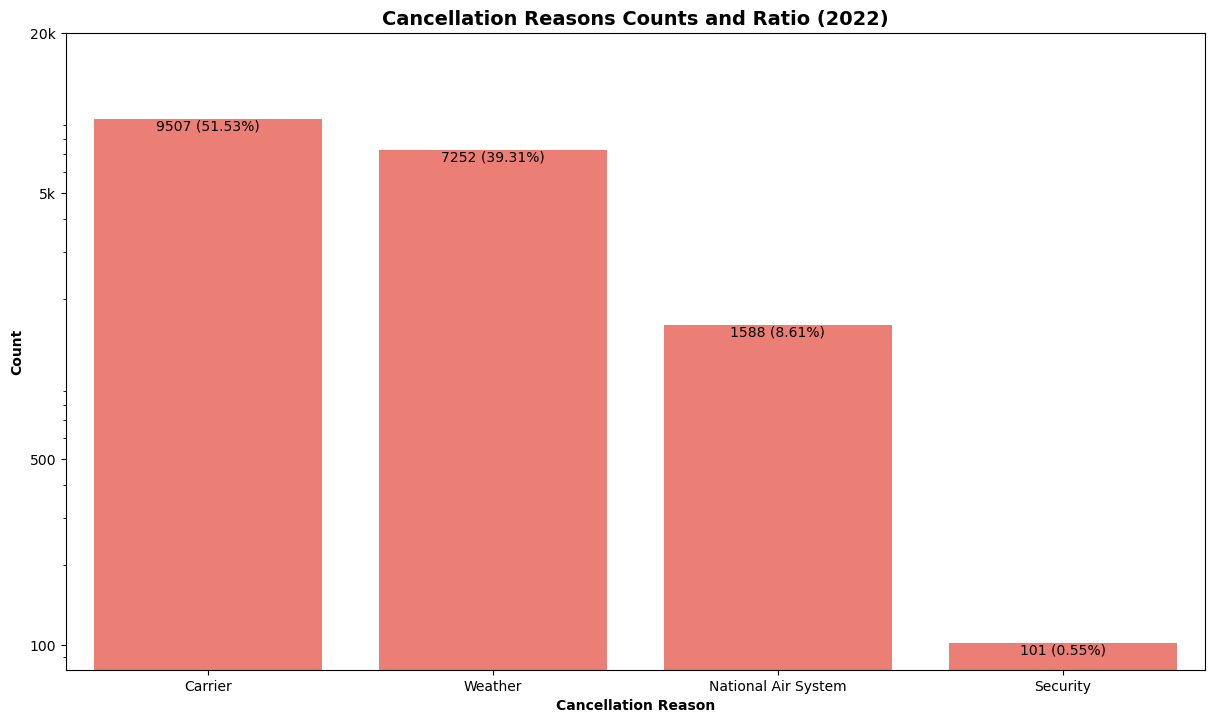

In [51]:
plt.figure(figsize=[14.70, 8.27])


new_base_color = '#FF6F61'  

# Get the order for the plot based on the value counts of 'CANCELLATION_CODE'
order = canceled_flights_2022['CANCELLATION_CODE'].value_counts().index

g = sns.countplot(data=canceled_flights_2022, x='CANCELLATION_CODE', color=new_base_color, order=order)

# Annotate the bars with counts and percentages using iloc for position-based access
for bar in range(canceled_flights_2022['CANCELLATION_CODE'].value_counts().shape[0]):
    count = canceled_flights_2022['CANCELLATION_CODE'].value_counts().iloc[bar]
    pct = (count / canceled_flights_2022['CANCELLATION_CODE'].shape[0]) * 100
    plt.text(x=bar, y=count, s=f"{count} ({pct:.2f}%)", va='top', ha='center')

# Set a logarithmic scale for the y-axis and adjust the y-ticks
plt.yscale('log')
plt.yticks([100, 500, 5e3, 2e4], [100, 500, '5k', '20k'])

g.set_xticklabels(['Carrier', 'Weather', 'National Air System', 'Security'])

plt.xlabel('Cancellation Reason', fontsize=10, weight="bold")
plt.ylabel('Count', fontsize=10, weight="bold")

plt.title('Cancellation Reasons Counts and Ratio (2022)', weight='bold', size=14)

plt.show()

As we can see, cancelations were dominated by either carrier faults or weather lets look at the number of flights cancled per month in the year ot see if this corisponds with poor weather months 

C:\Users\goderisd\AppData\Local\Temp\ipykernel_12756\523446435.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


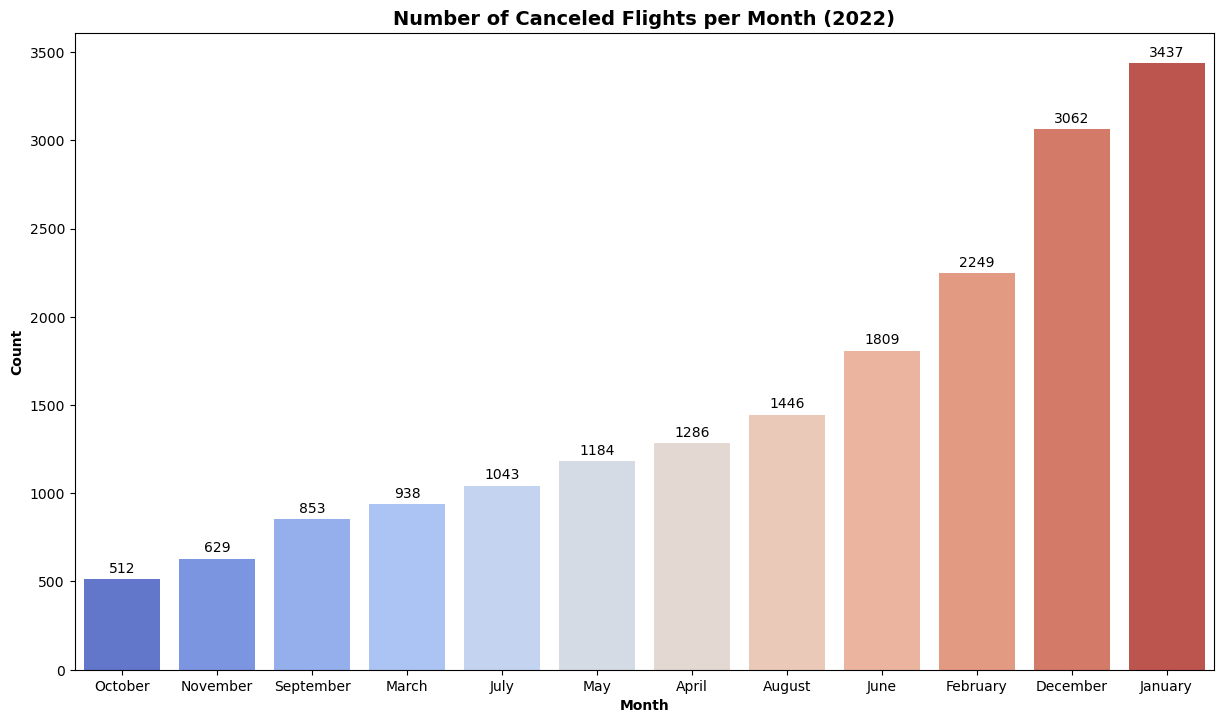

In [53]:
# Ensure 'FL_DATE' is in datetime format
canceled_flights_2022['FL_DATE'] = pd.to_datetime(canceled_flights_2022['FL_DATE'], errors='coerce')

plt.figure(figsize=[14.70, 8.27])

month_counts = canceled_flights_2022['FL_DATE'].dt.month_name().value_counts()

sorted_month_counts = month_counts.sort_values(ascending=True)

colors = sns.color_palette("coolwarm", len(sorted_month_counts))

sns.barplot(
    x=sorted_month_counts.index, 
    y=sorted_month_counts.values, 
    palette=colors
)

plt.xlabel('Month', fontsize=10, weight="bold")
plt.ylabel('Count', fontsize=10, weight="bold")
plt.title('Number of Canceled Flights per Month (2022)', fontsize=14, weight="bold")

for bar in range(len(sorted_month_counts)):
    count = sorted_month_counts.values[bar]
    plt.text(x=bar, y=count + 100, s=f'{count}', va='top', ha='center')

plt.show()

#used Chatgpt 4.0 to help figure out how to order plot in increasing delay instead of month (oct12th 4pm)

C:\Users\goderisd\AppData\Local\Temp\ipykernel_12756\4128211339.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_weather_events.index, y=monthly_weather_events.values, palette='coolwarm')


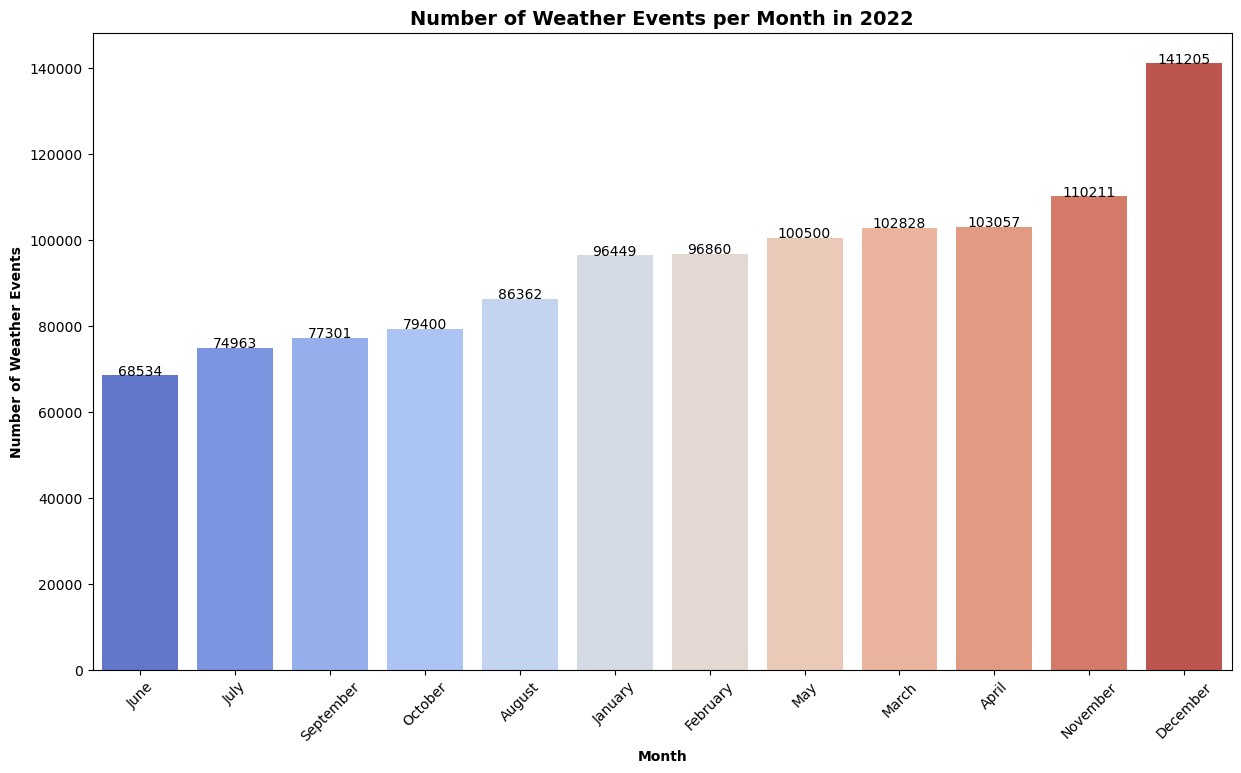

In [57]:
# Ensure the 'StartTime(UTC)' is in datetime format
weather_data_2022['StartTime(UTC)'] = pd.to_datetime(weather_data_2022['StartTime(UTC)'])

weather_data_2022['Month'] = weather_data_2022['StartTime(UTC)'].dt.month_name()

monthly_weather_events = weather_data_2022['Month'].value_counts().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)


monthly_weather_events = monthly_weather_events.sort_values()

plt.figure(figsize=[14.70, 8.27])

sns.barplot(x=monthly_weather_events.index, y=monthly_weather_events.values, palette='coolwarm')

plt.xlabel('Month', fontsize=10, weight='bold')
plt.ylabel('Number of Weather Events', fontsize=10, weight='bold')
plt.title('Number of Weather Events per Month in 2022', fontsize=14, weight='bold')

# Annotate the bars with counts
for i, count in enumerate(monthly_weather_events.values):
    plt.text(i, count + 1, count, ha='center')

plt.xticks(rotation=45)
plt.show()


<Figure size 1400x700 with 0 Axes>

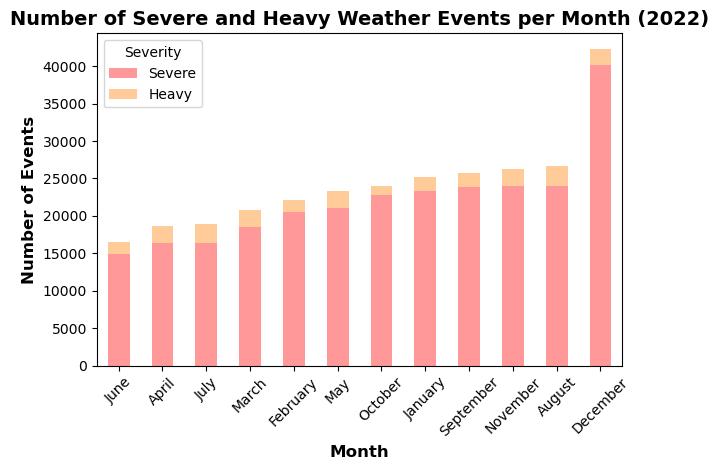

In [59]:
unique_severity_entries = weather_data_2022['Severity'].unique()
unique_severity_entries

#check the number of severe and heavy evetns per month to see if that more closely aligns with the cancellation data 
severe_heavy_events = weather_data_2022[weather_data_2022['Severity'].isin(['Severe', 'Heavy'])]

severe_heavy_events.loc[:, 'Month'] = severe_heavy_events['StartTime(UTC)'].dt.month_name()

monthly_counts = severe_heavy_events.groupby(['Month', 'Severity']).size().unstack(fill_value=0)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts = monthly_counts.reindex(month_order)

monthly_counts['Total'] = monthly_counts.sum(axis=1)
sorted_months = monthly_counts.sort_values(by='Total')

plt.figure(figsize=(14, 7))
sorted_months[['Severe', 'Heavy']].plot(kind='bar', stacked=True, color=['#FF9999', '#FFCC99'])

plt.xlabel('Month', fontsize=12, weight='bold')
plt.ylabel('Number of Events', fontsize=12, weight='bold')
plt.title('Number of Severe and Heavy Weather Events per Month (2022)', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.legend(title='Severity', fontsize=10)
plt.tight_layout()

plt.show()

C:\Users\goderisd\AppData\Local\Temp\ipykernel_12756\3271824071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snow_events['Month'] = snow_events['StartTime(UTC)'].dt.month_name()


<Figure size 1400x700 with 0 Axes>

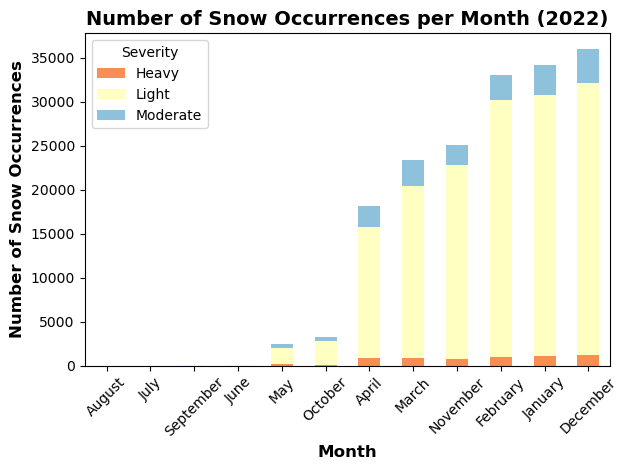

In [61]:
#potentially the issue is the tye of weather, less hte severity, lest filter for snow and chart the severity 
# Filter for snow occurrences
snow_events = weather_data_2022[weather_data_2022['Type'] == 'Snow']

snow_events['Month'] = snow_events['StartTime(UTC)'].dt.month_name()

monthly_snow_counts = snow_events.groupby(['Month', 'Severity']).size().unstack(fill_value=0)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_snow_counts['Total'] = monthly_snow_counts.sum(axis=1)

monthly_snow_counts = monthly_snow_counts.sort_values(by='Total')

sorted_month_order = monthly_snow_counts.index.tolist()

plt.figure(figsize=(14, 7))

# Use the color palette to differentiate severity
colors = sns.color_palette("RdYlBu", len(monthly_snow_counts.columns) - 1)  # Exclude 'Total'

monthly_snow_counts.drop(columns='Total').reindex(sorted_month_order).plot(kind='bar', stacked=True, color=colors)

plt.xlabel('Month', fontsize=12, weight='bold')
plt.ylabel('Number of Snow Occurrences', fontsize=12, weight='bold')
plt.title('Number of Snow Occurrences per Month (2022)', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.legend(title='Severity', fontsize=10)
plt.tight_layout()

plt.show()

# this seems to match our cancellations a lot better!


C:\Users\goderisd\AppData\Local\Temp\ipykernel_12756\2367719195.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfMonth', y='Count', data=day_counts_sorted, palette='coolwarm', order=ordered_days)


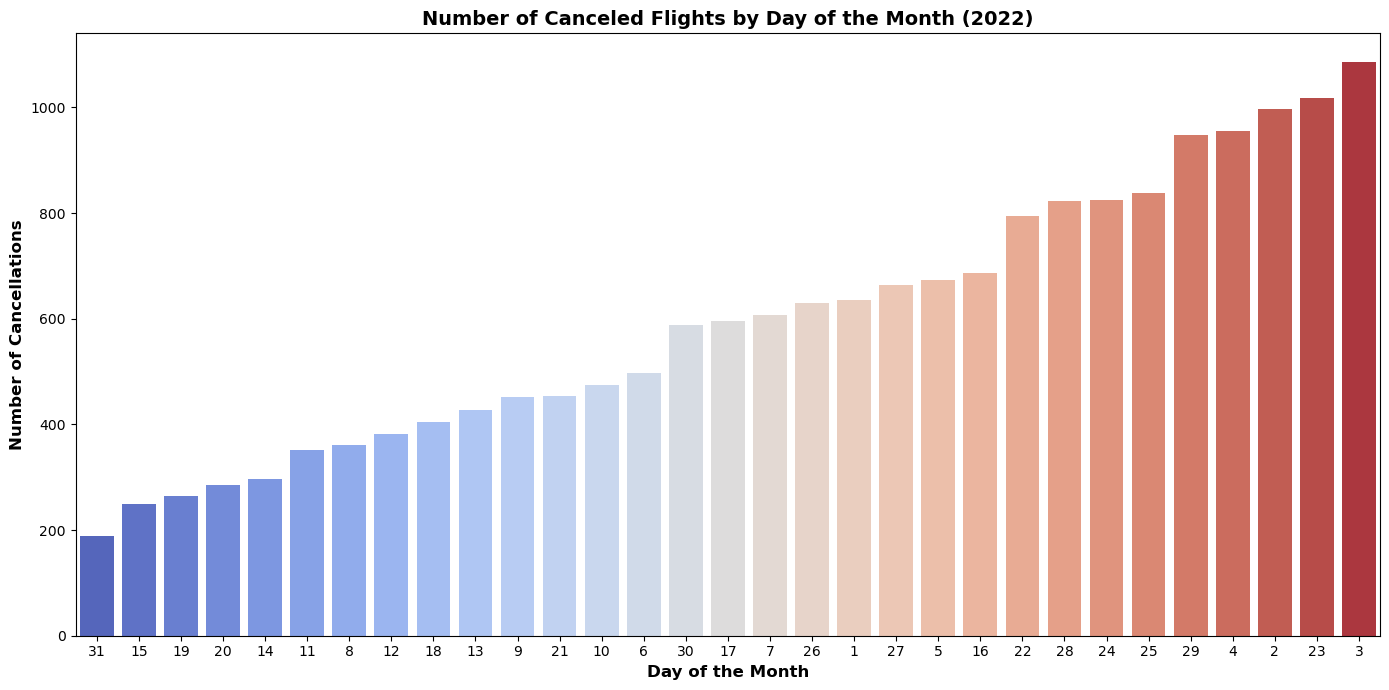

In [71]:
canceled_flights = canceled_flights_2022

# Ensure FL_DATE is a datetime column
canceled_flights['FL_DATE'] = pd.to_datetime(canceled_flights['FL_DATE'])

# Extract the day of the month from the flight date
canceled_flights['DayOfMonth'] = canceled_flights['FL_DATE'].dt.day

day_counts = canceled_flights['DayOfMonth'].value_counts()

day_counts_sorted = day_counts.sort_values().reset_index()
day_counts_sorted.columns = ['DayOfMonth', 'Count']

ordered_days = day_counts_sorted['DayOfMonth'].tolist()


plt.figure(figsize=(14, 7))

sns.barplot(x='DayOfMonth', y='Count', data=day_counts_sorted, palette='coolwarm', order=ordered_days)

# Set labels and title
plt.xlabel('Day of the Month', fontsize=12, weight='bold')
plt.ylabel('Number of Cancellations', fontsize=12, weight='bold')
plt.title('Number of Canceled Flights by Day of the Month (2022)', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

C:\Users\goderisd\AppData\Local\Temp\ipykernel_12756\23486941.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=canceled_flights, x='AIRLINE_CODE', order=airline_counts.index, palette='coolwarm')


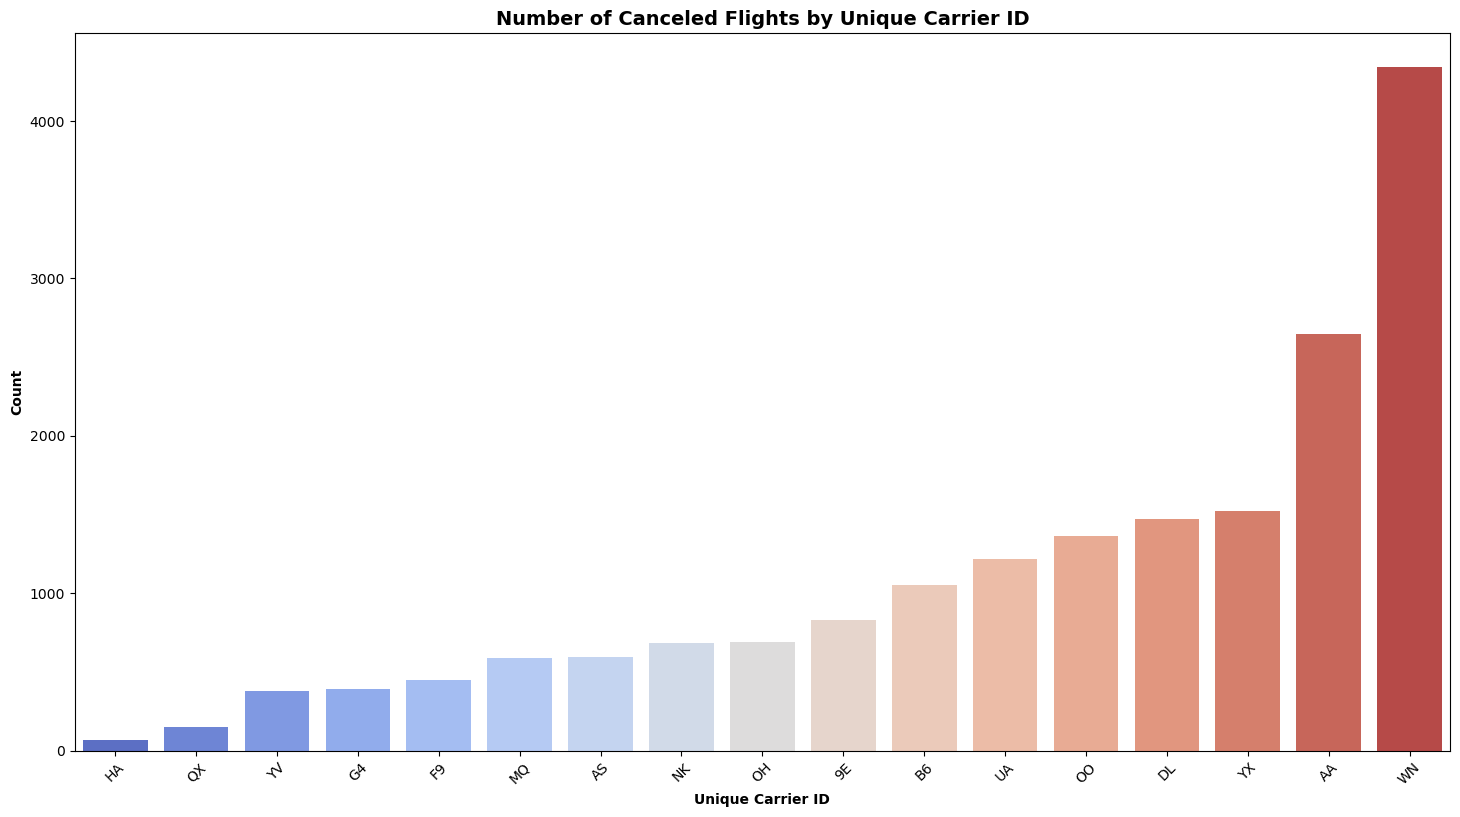

In [65]:
# number of canellations per carrier 
plt.figure(figsize=[14.70, 8.27])

airline_counts = canceled_flights['AIRLINE_CODE'].value_counts().sort_values()

sns.countplot(data=canceled_flights, x='AIRLINE_CODE', order=airline_counts.index, palette='coolwarm')

plt.xlabel('Unique Carrier ID', fontsize=10, weight='bold')
plt.ylabel('Count', fontsize=10, weight='bold')
plt.title('Number of Canceled Flights by Unique Carrier ID', fontsize=14, weight='bold')

plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


**Start some Bivariate Exploration**

C:\Users\goderisd\AppData\Local\Temp\ipykernel_12756\2768533295.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=month_data, x='AIRLINE_CODE', y='PercentageCanceled', ax=axes[i],
C:\Users\goderisd\AppData\Local\Temp\ipykernel_12756\2768533295.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=month_data, x='AIRLINE_CODE', y='PercentageCanceled', ax=axes[i],
C:\Users\goderisd\AppData\Local\Temp\ipykernel_12756\2768533295.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=month_data, x='AIRLINE_CODE', y='PercentageCancel

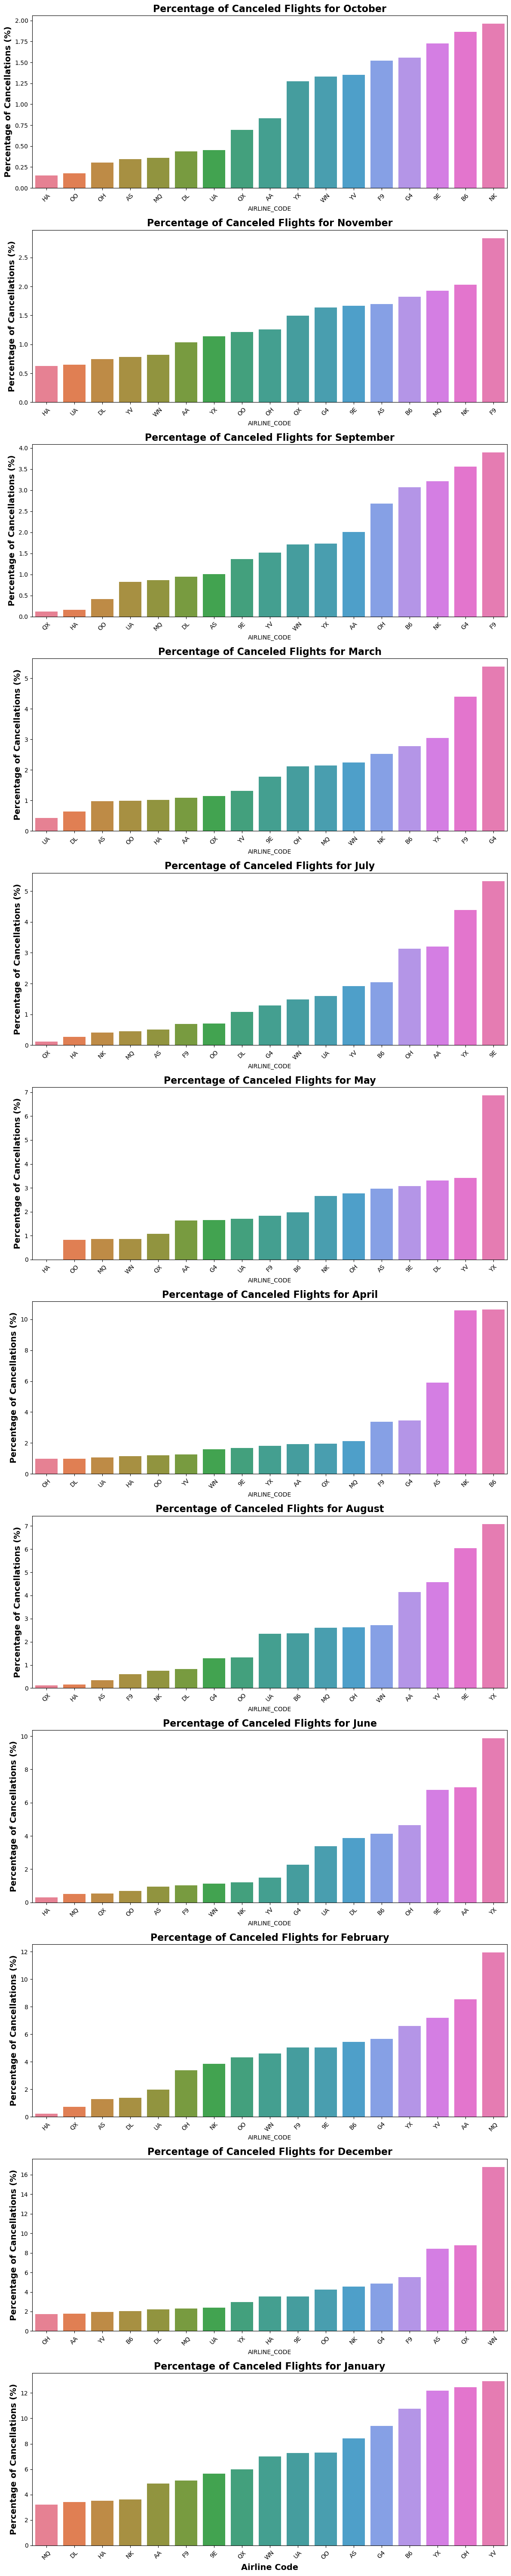

In [67]:
# Load the non-canceled flights data
non_cancelled_flights_2022 = pd.read_csv('non_cancelled_flights_2022.csv')

# Load the canceled flights data
canceled_flights_2022 = pd.read_csv('canceled_flights_2022.csv')

# Ensure FL_DATE is in datetime format for non-canceled flights
non_cancelled_flights_2022['FL_DATE'] = pd.to_datetime(non_cancelled_flights_2022['FL_DATE'])

non_cancelled_flights_2022['Month'] = non_cancelled_flights_2022['FL_DATE'].dt.month_name()

canceled_flights_2022['FL_DATE'] = pd.to_datetime(canceled_flights_2022['FL_DATE'])

canceled_flights_2022['Month'] = canceled_flights_2022['FL_DATE'].dt.month_name()

total_flights = non_cancelled_flights_2022.groupby(['Month', 'AIRLINE_CODE']).size().reset_index(name='TotalFlights')

canceled_counts = canceled_flights_2022.groupby(['Month', 'AIRLINE_CODE']).size().reset_index(name='CanceledCount')

merged_counts = pd.merge(total_flights, canceled_counts, on=['Month', 'AIRLINE_CODE'], how='left').fillna(0)

merged_counts['CanceledCount'] = merged_counts['CanceledCount'].astype(int)  # Ensure integer type for proper calculation
merged_counts['PercentageCanceled'] = (merged_counts['CanceledCount'] / merged_counts['TotalFlights']) * 100

monthly_cancellations = merged_counts.groupby('Month')['CanceledCount'].sum().reset_index()
monthly_cancellations = monthly_cancellations.sort_values(by='CanceledCount')

ordered_months = monthly_cancellations['Month'].tolist()
merged_counts['Month'] = pd.Categorical(merged_counts['Month'], categories=ordered_months, ordered=True)
merged_counts = merged_counts.sort_values(by=['Month', 'PercentageCanceled'])

# Create a color palette for uniformity
color_palette = sns.color_palette("husl", len(merged_counts['AIRLINE_CODE'].unique()))

num_months = len(ordered_months)
fig, axes = plt.subplots(nrows=num_months, ncols=1, figsize=(12, 5 * num_months))

# Plot each month in a separate subplot
for i, month in enumerate(ordered_months):
    month_data = merged_counts[merged_counts['Month'] == month]
    
    sns.barplot(data=month_data, x='AIRLINE_CODE', y='PercentageCanceled', ax=axes[i],
                palette=color_palette, order=month_data['AIRLINE_CODE'])
    
    axes[i].set_title(f'Percentage of Canceled Flights for {month}', fontsize=16, weight='bold')
    axes[i].set_ylabel('Percentage of Cancellations (%)', fontsize=14, weight='bold')
    axes[i].tick_params(axis='x', rotation=45)

    axes[i].set_xticks(range(len(month_data['AIRLINE_CODE'])))
    axes[i].set_xticklabels(month_data['AIRLINE_CODE'].unique(), rotation=45)

axes[-1].set_xlabel('Airline Code', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


In [31]:
print(non_cancelled_flights_2022.columns)


Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'Year', 'Month'],
      dtype='object')


In [35]:
# take major 3 us airlines and look at hteir delay metrics 

# pull delta united and american out, search for when any delay column is not NAN
#Define airline codes for Delta, United, and American Airlines
major_airlines = ['DL', 'UA', 'AA']

# Filter the dataset for these airlines from non_cancelled_flights_2022
major_airlines_data = non_cancelled_flights_2022[non_cancelled_flights_2022['AIRLINE_CODE'].isin(major_airlines)]

# Define the actual delay columns
delay_columns = ['DEP_DELAY', 'ARR_DELAY', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 
                 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

# Filter out rows where any of the delay columns are not NaN
delayed_flights = major_airlines_data.dropna(subset=delay_columns, how='all')

# Show the first few rows of the filtered dataset for the three airlines
print(delayed_flights.head())

# Calculate metrics like mean delay for each airline across the different delay columns
delay_metrics = delayed_flights.groupby('AIRLINE_CODE')[delay_columns].mean().reset_index()

print(delay_metrics)

     FL_DATE                 AIRLINE                 AIRLINE_DOT AIRLINE_CODE  \
0 2022-11-19    Delta Air Lines Inc.    Delta Air Lines Inc.: DL           DL   
1 2022-07-22   United Air Lines Inc.   United Air Lines Inc.: UA           UA   
4 2022-11-12    Delta Air Lines Inc.    Delta Air Lines Inc.: DL           DL   
5 2022-09-06  American Airlines Inc.  American Airlines Inc.: AA           AA   
8 2022-10-08  American Airlines Inc.  American Airlines Inc.: AA           AA   

   DOT_CODE  FL_NUMBER ORIGIN            ORIGIN_CITY DEST        DEST_CITY  \
0     19790       1149    MSP        Minneapolis, MN  SEA      Seattle, WA   
1     19977        459    DEN             Denver, CO  MSP  Minneapolis, MN   
4     19790       2706    GRR       Grand Rapids, MI  MSP  Minneapolis, MN   
5     19805       1754    DFW  Dallas/Fort Worth, TX  PNS    Pensacola, FL   
8     19805       2720    DFW  Dallas/Fort Worth, TX  TUS       Tucson, AZ   

   ...  ELAPSED_TIME  AIR_TIME  DISTANCE  DE

C:\Users\goderisd\AppData\Local\Temp\ipykernel_12756\1058672319.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(['Carrier', 'Weather', 'Nat. Air Sys.', 'Security', 'Late Aircraft'])


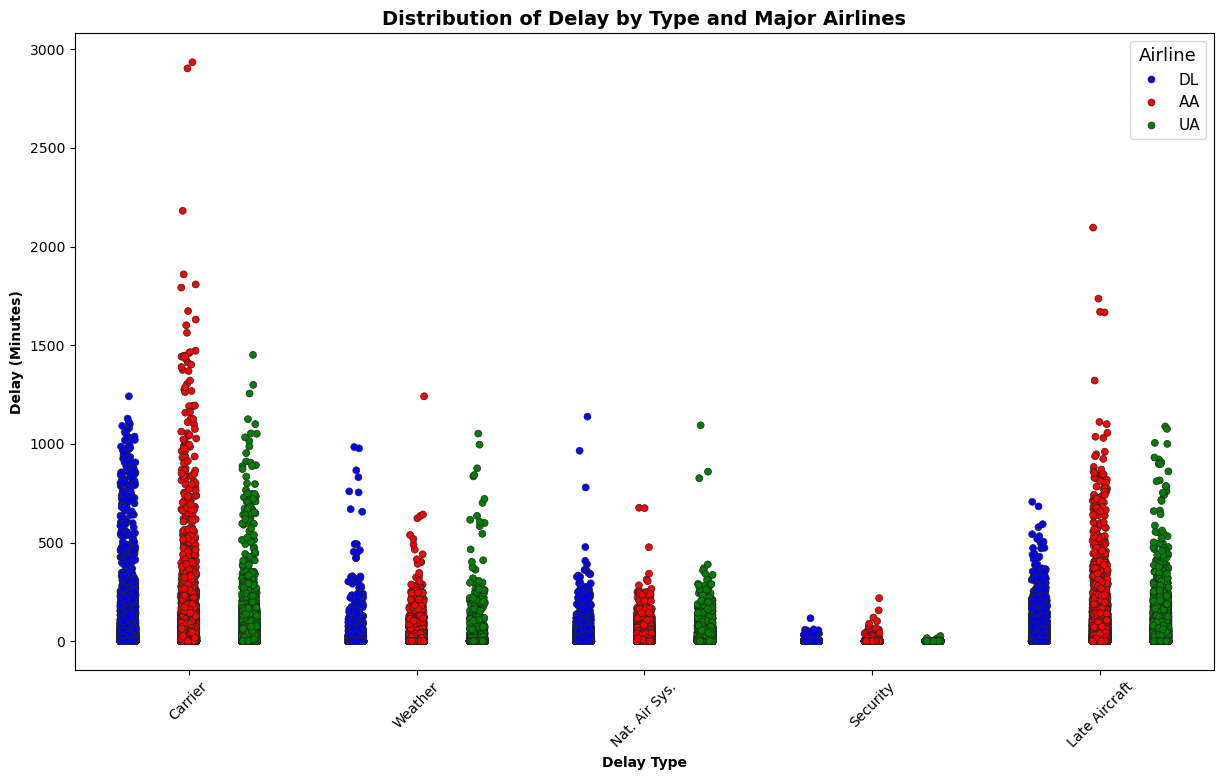

In [43]:
# Define major airline codes and color palette for these airlines
# Define major airline codes and color palette for these airlines
major_airlines = ['DL', 'UA', 'AA']  # Delta, United, American Airlines
color_palette = {'DL': 'blue', 'UA': 'green', 'AA': 'red'}  # Assign colors

# Filter dataset for only major airlines
major_airlines_data = non_cancelled_flights_2022[non_cancelled_flights_2022['AIRLINE_CODE'].isin(major_airlines)]

# Define the relevant delay columns
delay_columns = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

# Melt the DataFrame to get the delay type as an x-axis category
melted_df = major_airlines_data.melt(id_vars=['AIRLINE_CODE'], value_vars=delay_columns,
                                     var_name='DelayType', value_name='DelayMinutes')

# Remove rows with NaN delay minutes
melted_df = melted_df.dropna(subset=['DelayMinutes'])

# Convert DelayType to a categorical variable with the correct order
delay_categories = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']
melted_df['DelayType'] = pd.Categorical(melted_df['DelayType'], categories=delay_categories, ordered=True)

# Create the strip plot
plt.figure(figsize=(14.70, 8.27))

g = sns.stripplot(data=melted_df, x='DelayType', y='DelayMinutes', hue='AIRLINE_CODE',
                  dodge=True, linewidth=0.5, palette=color_palette)

# Set the custom x-axis tick labels to match the delay types
g.set_xticklabels(['Carrier', 'Weather', 'Nat. Air Sys.', 'Security', 'Late Aircraft'])

# Title, labels, and legend
plt.title("Distribution of Delay by Type and Major Airlines", fontsize=14, weight="bold")
plt.ylabel('Delay (Minutes)', fontsize=10, weight="bold")
plt.xlabel('Delay Type', fontsize=10, weight="bold")

# Display the legend and plot
plt.legend(title='Airline', title_fontsize='13', fontsize='11')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability

plt.show()

#used chatgpt 4.0 to help wit hte stripplot syntax on oct 14th at 6pm